
<div style='text-align:center;color:red;font-size:36px;margin:10px'> CORONA VIRUS ALERT !!!</div>
<div style='margin-top:20px;text-align:center;font-size:16px'>A deadly virus spreading from Human to Human</div>
    

### Description
<span style='background:yellow'>2019 Novel Coronavirus (2019-nCoV) is a virus (more specifically, a coronavirus) identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China.</span> Early on, many of the patients in the outbreak in Wuhan, China reportedly had some link to a large seafood and animal market, suggesting animal-to-person spread. However, a growing number of patients reportedly have not had exposure to animal markets, indicating person-to-person spread is occurring. At this time, it’s unclear how easily or sustainably this virus is spreading between people - CDC

This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. Please note that this is a time series data and so the number of cases on any given day is the cumulative number.

The data is available from 22 Jan, 2020.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

In [2]:
dataset = pd.read_csv("/kaggle/input/novel-corona-virus-2019-dataset/2019_nCoV_data.csv")

In [3]:
dataset.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


In [4]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Last Update'] = pd.to_datetime(dataset['Last Update'])

In [5]:
dataset['Day'] = dataset['Date'].dt.day
dataset['Month'] = dataset['Date'].dt.month
dataset['Week'] = dataset['Date'].dt.week
dataset['WeekDay'] = dataset['Date'].dt.weekday

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "


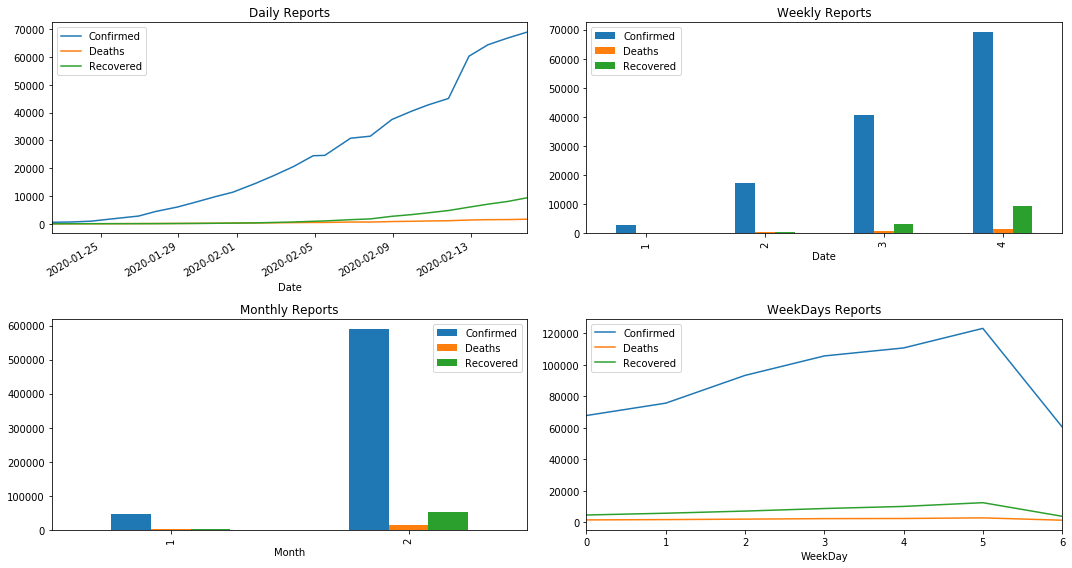

In [6]:
# Layout Customization
displayed_cols = ['Confirmed','Deaths','Recovered']
def multi_plot():
    fig = plt.figure(constrained_layout=True, figsize=(15,8))
    grid = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)

    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Daily Reports')
    dataset.groupby(['Date']).sum()[displayed_cols].plot(ax=ax1)

    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('Monthly Reports')
    dataset.groupby(['Month']).sum()[displayed_cols].plot(kind='bar',ax=ax2)
    ax2.set_xticklabels(range(1,3))

    ax3= fig.add_subplot(grid[0, 2:])
    ax3.set_title('Weekly Reports')
    weekdays = dataset.groupby('Week').nth(-1)['Date']
    dataset[dataset['Date'].isin(weekdays)].groupby('Date')[displayed_cols].sum().plot(kind='bar',ax=ax3)
    ax3.set_xticklabels(range(1,len(weekdays)+1))

    ax4 = fig.add_subplot(grid[1, 2:])
    ax4.set_title('WeekDays Reports')
    dataset.groupby(['WeekDay']).sum()[displayed_cols].plot(ax=ax4)
    plt.tight_layout()
multi_plot()

Graph shows that case count is <span style='color:red'> getting increased daily </span> which means that <span style='color:green'>latest case count = today case count + previous days case count</span>. So we will take the <span style='color:red'><b>last date</b></span> as the updated case count.

In [7]:
recent_date = dataset['Date'].iloc[-1]
last_updated = dataset[dataset['Date'].dt.date == recent_date]

In [8]:
# Reports given for the total number of days
dataset['Date'].max() - dataset['Date'].min()

Timedelta('24 days 10:00:00')

In [9]:
dataset['Country'].value_counts()

Mainland China          739
US                      166
Australia                76
Canada                   53
China                    34
South Korea              25
Japan                    25
Thailand                 25
Taiwan                   24
Vietnam                  24
Hong Kong                24
Macau                    24
Singapore                24
Malaysia                 23
France                   23
Nepal                    22
Cambodia                 20
Germany                  20
Sri Lanka                20
Philippines              18
Finland                  18
United Arab Emirates     18
Italy                    17
India                    17
UK                       16
Sweden                   16
Russia                   16
Spain                    16
Belgium                  12
Others                    9
Egypt                     2
Brazil                    1
Ivory Coast               1
Mexico                    1
Name: Country, dtype: int64

<span style='color:blue'> Observation : </span>

Mainland China and China has two separate entries. We'll combine the both

<span style='background:yellow;color:black'> Description of this Dataset and also News Confirms that CoronaVirus spreaded from China</span> and from the above table after China. US,Australia and Canada has higher entries and geographically these countries are too far from China . It's weired We'll analyse it further

In [10]:
dataset['Country'].replace({'Mainland China':'China'},inplace=True)

In [11]:
dataset.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Month,Week,WeekDay
0,1,2020-01-22 12:00:00,Anhui,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,1,4,2
1,2,2020-01-22 12:00:00,Beijing,China,2020-01-22 12:00:00,14.0,0.0,0.0,22,1,4,2
2,3,2020-01-22 12:00:00,Chongqing,China,2020-01-22 12:00:00,6.0,0.0,0.0,22,1,4,2
3,4,2020-01-22 12:00:00,Fujian,China,2020-01-22 12:00:00,1.0,0.0,0.0,22,1,4,2
4,5,2020-01-22 12:00:00,Gansu,China,2020-01-22 12:00:00,0.0,0.0,0.0,22,1,4,2


In [12]:
dataset[dataset['Date'] != dataset['Last Update']]['Country'].value_counts()

China                   493
US                      138
Australia                61
Canada                   43
France                   17
Japan                    16
Vietnam                  16
South Korea              16
Hong Kong                16
Nepal                    16
Taiwan                   16
Macau                    16
Malaysia                 16
Singapore                16
Thailand                 16
India                    15
Russia                   15
Italy                    15
Philippines              15
Sweden                   15
UK                       15
Cambodia                 15
United Arab Emirates     15
Sri Lanka                15
Finland                  15
Spain                    15
Germany                  15
Belgium                  12
Others                    9
Egypt                     2
Name: Country, dtype: int64

<span> These many province/State were not updated yet with last date.</span>

In [13]:
dataset['Last Update'].max()

Timestamp('2020-09-02 04:03:00')

In [14]:
# missing values
dataset.isnull().sum()

Sno                 0
Date                0
Province/State    418
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
Day                 0
Month               0
Week                0
WeekDay             0
dtype: int64

In [15]:
confirmedCase = int(last_updated['Confirmed'].sum())
deathCase = int(last_updated['Deaths'].sum())
recoveredCase = int(last_updated['Recovered'].sum())
print("No of Confirmed cases globally {}".format(confirmedCase))
print("No of Recovered case globally {}".format(recoveredCase))
print("No of Death case globally {}".format(deathCase))

No of Confirmed cases globally 69032
No of Recovered case globally 9395
No of Death case globally 1666


In [16]:
top5 =  last_updated.groupby(['Country']).sum().nlargest(5,['Confirmed'])[displayed_cols]
top5
print("Top 5 Countries were affected most")
print(top5)

Top 5 Countries were affected most
                Confirmed  Deaths  Recovered
Country                                     
Mainland China    68347.0  1662.0     9294.0
Others              285.0     0.0        0.0
Singapore            72.0     0.0       18.0
Hong Kong            56.0     1.0        1.0
Japan                43.0     1.0       12.0


<span style='color:blue'> Observation : </span>

Though US,Canada and Australia has higher entries after China but they are not in the top 5 list


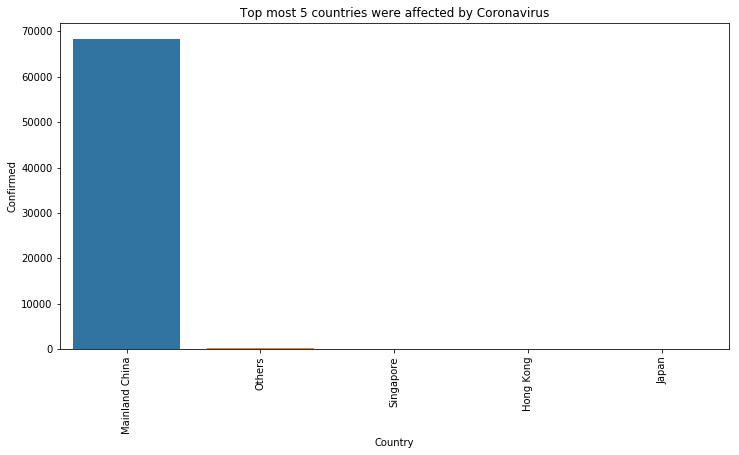

In [17]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title("Top most 5 countries were affected by Coronavirus")
sns.barplot(x=top5.index,y='Confirmed',data=top5)
plt.show()

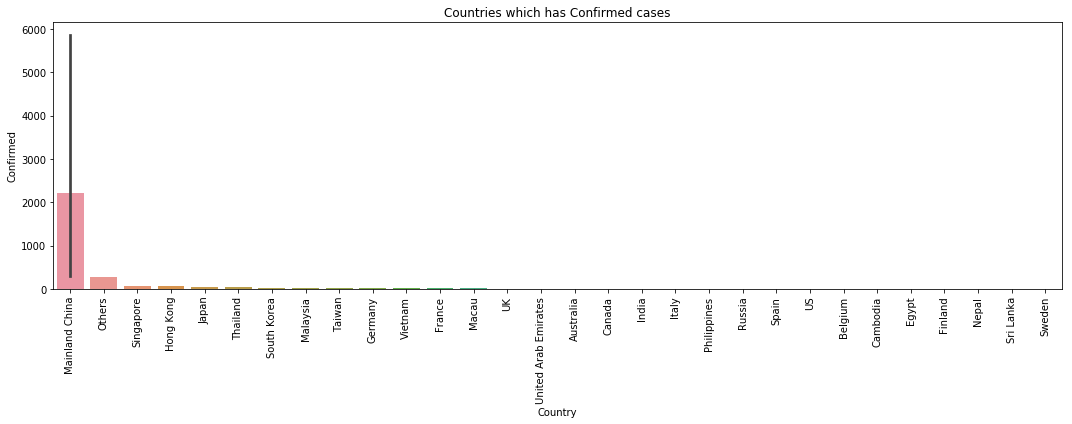

In [18]:
plt.figure(figsize=(15,6))
plt.title('Countries which has Confirmed cases')
plt.xticks(rotation=90)
sns.barplot(x='Country',y='Confirmed',data=last_updated)
plt.tight_layout()

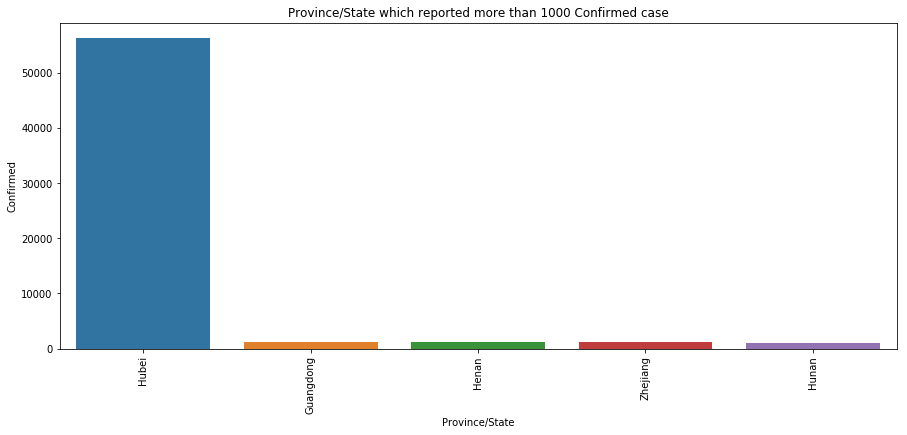

In [19]:
plt.figure(figsize=(15,6))
plt.title('Province/State which reported more than 1000 Confirmed case')
plt.xticks(rotation=90)
prvinc = last_updated
prvincConfirmed = prvinc[prvinc['Confirmed']>1000]
sns.barplot(data=prvincConfirmed, x='Province/State', y='Confirmed')

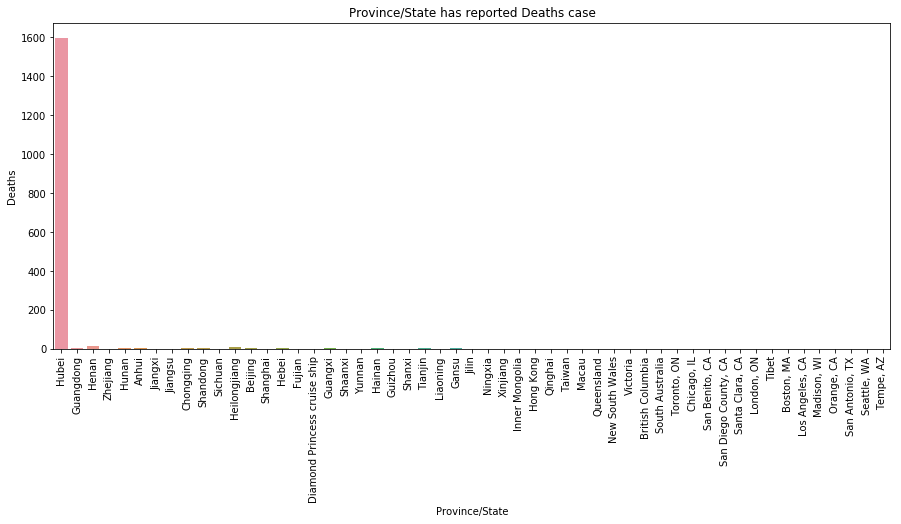

In [20]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Province/State has reported Deaths case')
sns.barplot(data=last_updated, x='Province/State', y='Deaths')

Wikipedia says - In December 2019, a pneumonia(Coronavirus) outbreak was reported in Wuhan, China.  <b><span style='font-size:18px'> Wuhan is the capital of Hubei province.</span></b>

In [21]:
prov100 = last_updated[last_updated['Confirmed']>100]['Province/State'].values
print("Countries their State which was affected and filed more than 100 Confirmed cases")
dataset[dataset['Province/State'].isin(prov100)].groupby('Country')['Province/State'].apply(lambda x: len(list(np.unique(x)))).sort_values(ascending=False)

Countries their State which was affected and filed more than 100 Confirmed cases


Country
China     24
Others     1
Name: Province/State, dtype: int64

In [22]:
last_updated.groupby(['Country']).sum().nlargest(5,['Deaths'])['Deaths']

Country
Mainland China    1662.0
France               1.0
Hong Kong            1.0
Japan                1.0
Philippines          1.0
Name: Deaths, dtype: float64

We'll analyse how other countries affected after China and Others(Cruis ship).

In [23]:
last_updated[~last_updated['Country'].isin(['China','Others']) ].groupby(['Country']).sum()[displayed_cols].nlargest(5,['Confirmed'])

,Confirmed,Deaths,Recovered
Country,,,
Mainland China,68347.0,1662.0,9294.0
Singapore,72.0,0.0,18.0
Hong Kong,56.0,1.0,1.0
Japan,43.0,1.0,12.0
Thailand,33.0,0.0,12.0


In [24]:
confCaseOnShip = dataset[(dataset['Province/State']!=np.nan) & (dataset['Province/State'].str.contains("ship"))]
confCaseOnShip

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Day,Month,Week,WeekDay
1081,1082,2020-02-09 23:20:00,Diamond Princess cruise ship,Others,2020-02-09 06:13:11,64.0,0.0,0.0,9,2,6,6
1147,1148,2020-02-10 19:30:00,Diamond Princess cruise ship,Others,2020-02-10 16:03:12,135.0,0.0,0.0,10,2,7,0
1219,1220,2020-02-11 20:44:00,Diamond Princess cruise ship,Others,2020-02-10 16:03:12,135.0,0.0,0.0,11,2,7,1
1290,1291,2020-02-12 22:00:00,Diamond Princess cruise ship,Others,2020-02-12 04:23:38,175.0,0.0,0.0,12,2,7,2
1363,1364,2020-02-13 21:15:00,Diamond Princess cruise ship,Others,2020-02-14 00:13:23,218.0,0.0,0.0,13,2,7,3
1437,1438,2020-02-14 22:00:00,Diamond Princess cruise ship,Others,2020-02-14 00:13:23,218.0,0.0,0.0,14,2,7,4
1510,1511,2020-02-15 22:00:00,Diamond Princess cruise ship,Others,2020-02-15 17:03:04,285.0,0.0,0.0,15,2,7,5


Princess Cruises confirms there are 2,666 guests and 1,045 crew currently onboard covering a range of nationalities
Totally 3711 members are there in ship
 <span style='color:green'>Out of <b>3711 </b></span>, <span style='color:red'><b>285</b></span> were confirmed

In [25]:
print("{}% of people were affected in Cruise ship".format(round((285/3711 ) * 100,2)))

7.68% of people were affected in Cruise ship


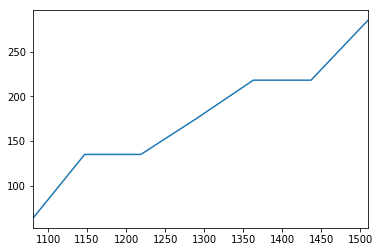

In [26]:
confCaseOnShip['Confirmed'].plot()

#### <span style='background:yellow'>confirmed case counts are increasing day by day in cruise ship</span>

Below Content taken from this article https://www.quora.com/What-is-the-Coronavirus-What-are-its-symptoms-How-do-you-prevent-the-Coronavirus answered by puneet aggarwal.

To prevent Coronavirus from spreading follow the below

1. Avoid using towels/soaps/ clothes used by any other person.

2. Keep cleaning your hands with a sanitizer especially after travelling in public transport like trains/ buses/ the metro etc.
3. <span style='background:yellow'>Keep yourself away from crowded areas.<span> 
4. <span style='background:yellow'>Always insist on wearing a mask especially use them for children.</span>
5. Drink only hot water

6. Keep your home, kitchen and bathroom dry. Viruses thrive in musty environments.

7. Have only fresh, hot, home cooked food.

Follow the highlighted steps, only if Coronavirus spreading in your Area and Other steps would help to have Healthy Life.